In [4]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

## With Usual Hamiltonian

In [5]:
# Load data
        
#timeslices = [2, 4, 8, 10]
degree = [2,3,4,5]
timeslices2 = [2,4,6,8]

grape_inf = []
pulseoptim_inf = []
pop_inf = []

for n_ts in degree:
    with h5py.File(f"RND_qutip_opt_results_qubits_{n_ts}_100.hdf5", 'r') as f:
        pulseoptim_inf.append(
            f["pulseoptim_inf"][...]
        )
        grape_inf.append(
            f["grape_inf"][...]
        )

    with h5py.File(f"results_{n_ts}.hdf5", 'r') as f:
        pop_inf.append(1 - f['Infidelity'][...]
                            )

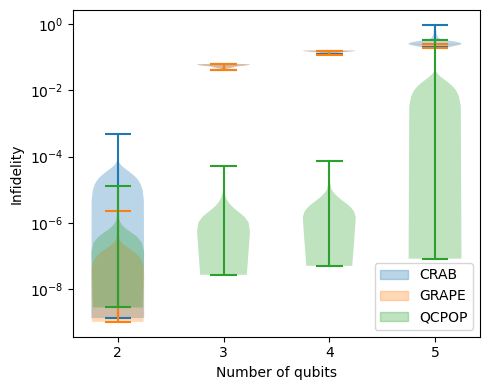

In [6]:
import matplotlib.patches as mpatches

plt.figure(figsize=(5, 4))

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

# GRAPE

add_label(plt.violinplot([np.abs(_)  for _ in pulseoptim_inf]), "CRAB")
add_label(plt.violinplot([np.abs(_)  for _ in grape_inf]), "GRAPE")    


add_label(plt.violinplot([np.abs(_) for _ in pop_inf]), "QCPOP")

plt.yscale('log')

plt.xticks(range(1, len(degree) + 1), degree )
plt.xlabel("Number of qubits")

plt.ylabel("Infidelity")

plt.legend(*zip(*labels), loc=4)

plt.tight_layout()

plt.savefig("Fig_grape_crab_vs_pop_magnus_random100.pdf")

plt.show()